In [29]:
import torch
import os

In [64]:
results_dict = torch.load('/home/parekh/xl_vlms/results/snmf_results.pth')

In [65]:
print(results_dict.keys())

dict_keys(['concepts', 'activations', 'decomposition_method', 'text_grounding', 'image_grounding_paths'])


In [70]:
concepts = results_dict['concepts']
activations = results_dict['activations']
text_grounding = results_dict['text_grounding']
image_paths = results_dict['image_grounding_paths']
print (concepts.shape, activations.shape)
num_concepts = concepts.shape[0]

torch.Size([20, 4096]) torch.Size([2192, 20])


In [67]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import matplotlib
print(matplotlib.__version__)

3.8.2


In [68]:
def visualize_grounding(concept_idx, text_grounding, image_paths):
    words = text_grounding[concept_idx]
    paths = image_paths[concept_idx]
    num_imgs = len(paths)
    images = []
    for path in paths:
        cur_img = plt.imread(path)
        cur_img = np.array(Image.fromarray(cur_img).resize([256, 256]))
        images.append(cur_img)
    width = num_imgs*2+0.1
    fig = plt.figure(figsize=(width, width/5))
    for i in range(num_imgs):
        fig.add_subplot(1, num_imgs, i+1)
        plt.imshow(images[i])
        plt.axis('off')
    fig.suptitle('Concept ' + str(concept_idx) + ': ' + str(words)) 

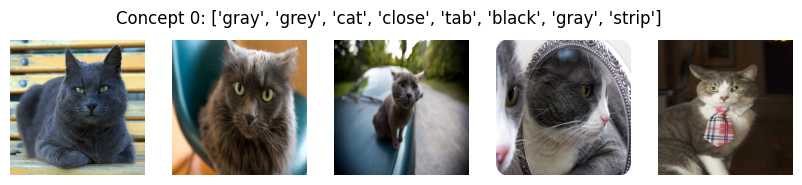

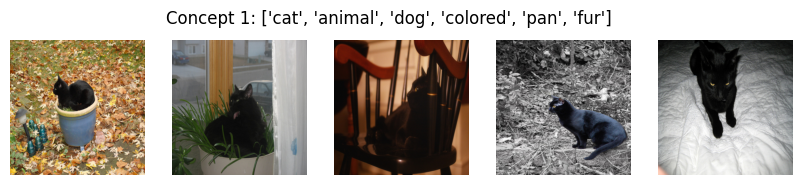

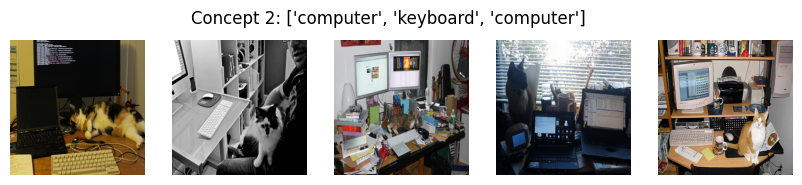

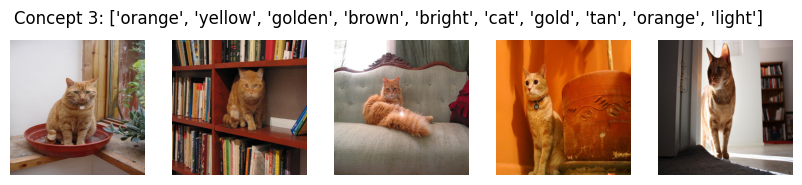

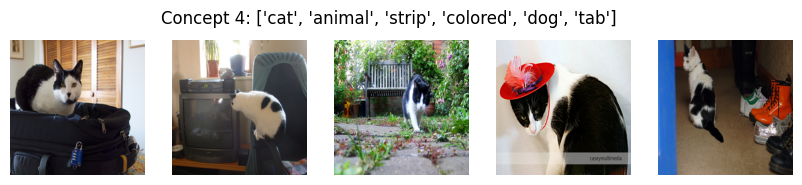

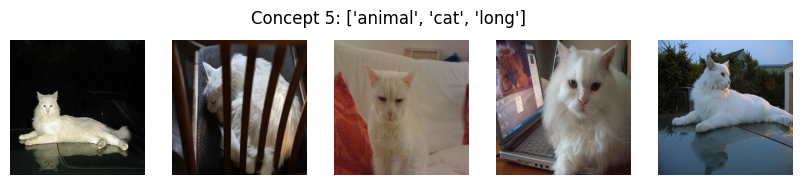

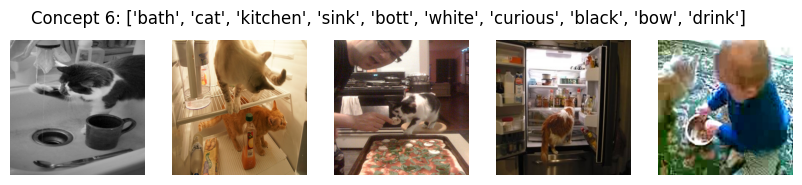

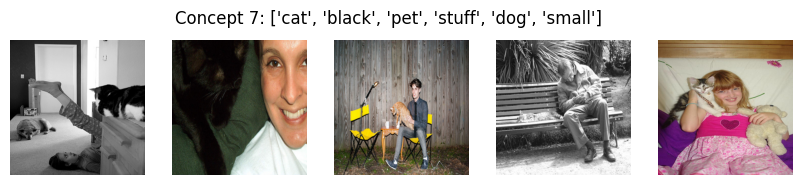

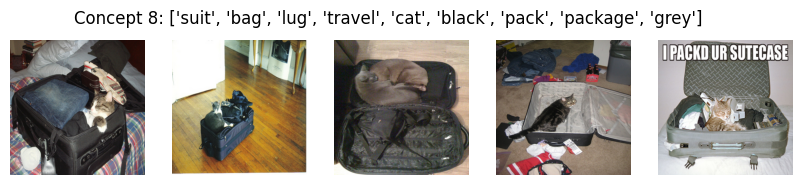

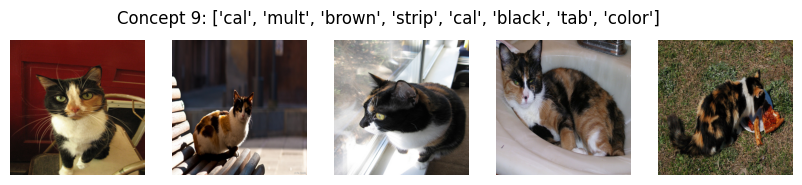

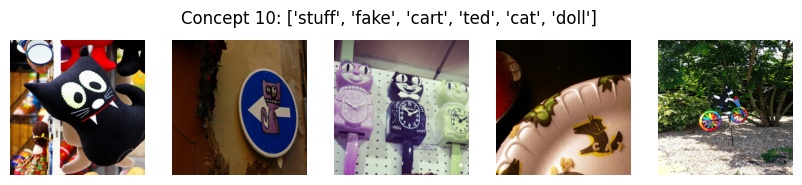

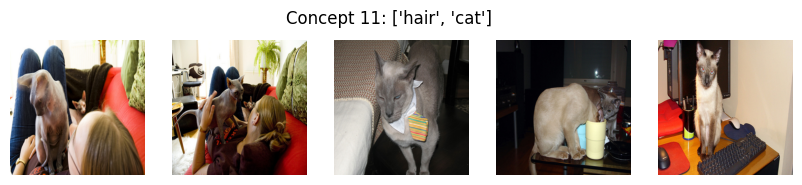

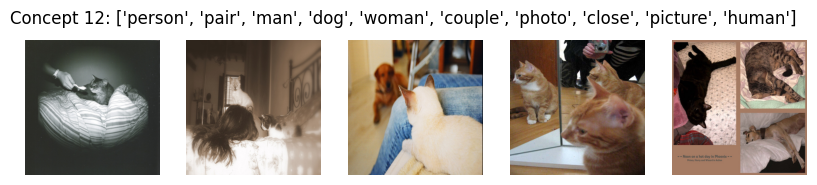

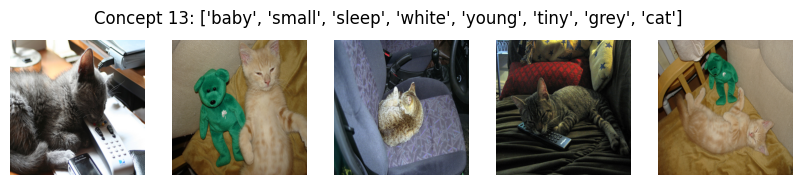

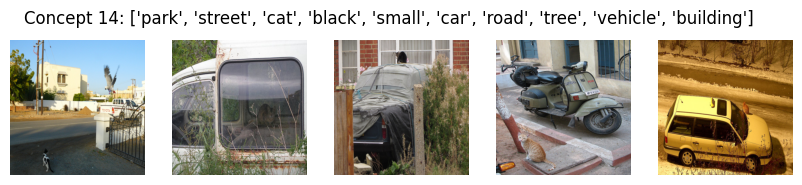

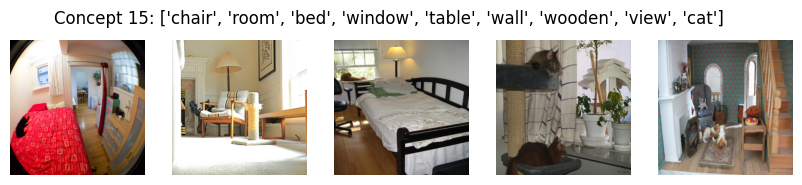

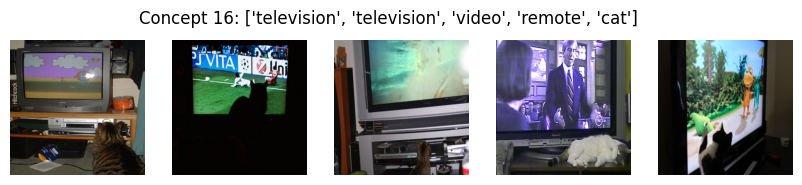

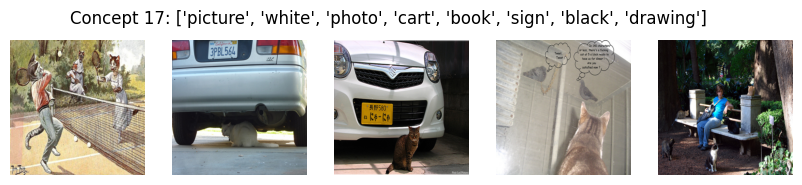

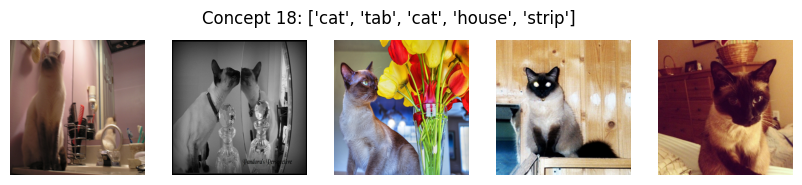

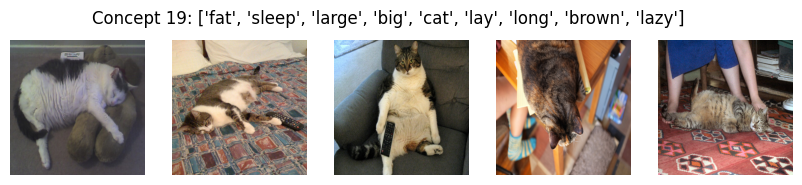

In [71]:
for k in range(num_concepts):
    visualize_grounding(k, text_grounding, image_paths)